In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
!cd MyDrive

In [4]:
! ls "/gdrive/MyDrive/Colab Notebooks/"

 assets				     Demo4.jpg	 keras_metadata.pb   variables
'Brain tumor classification.ipynb'   Demo.jpg	 Saved
 Demo2.jpeg			     dnn	 saved_model.pb
 Demo3.png			     Input	 Untitled0.ipynb


In [5]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [6]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'/gdrive/My Drive/Colab Notebooks/Input/MRI_images/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        

print(result)

[array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1.,

In [7]:
paths = []
for r, d, f in os.walk(r"/gdrive/My Drive/Colab Notebooks/Input/MRI_images/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [8]:
data = np.array(data)
data.shape
result = np.array(result)
result = result.reshape(139,2)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [10]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2), activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        1

In [11]:
y_train.shape

(111, 2)

In [12]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 26s 3s/step - loss: 67.3848 - val_loss: 26.5557
Epoch 2/30
3/3 [==============================] - 7s 2s/step - loss: 22.5276 - val_loss: 148.7827
Epoch 3/30
3/3 [==============================] - 6s 2s/step - loss: 18.3430 - val_loss: 43.2838
Epoch 4/30
3/3 [==============================] - 7s 2s/step - loss: 5.8968 - val_loss: 5.5060
Epoch 5/30
3/3 [==============================] - 7s 2s/step - loss: 5.6167 - val_loss: 10.3010
Epoch 6/30
3/3 [==============================] - 7s 2s/step - loss: 6.2201 - val_loss: 6.2860
Epoch 7/30
3/3 [==============================] - 7s 2s/step - loss: 2.1522 - val_loss: 2.5563
Epoch 8/30
3/3 [==============================] - 7s 2s/step - loss: 2.1391 - val_loss: 3.8104
Epoch 9/30
3/3 [==============================] - 6s 2s/step - loss: 3.6999 - val_loss: 2.1184
Epoch 10/30
3/3 [==============================] - 7s 2s/step - loss: 1.3495 - val_loss: 1.8760
Epoch 11/30
3/3 [=======================

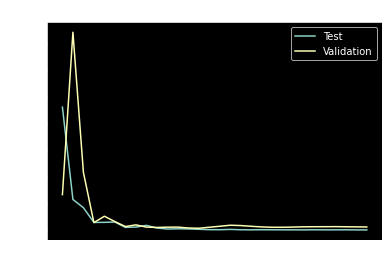

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [14]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['acc']
    val_acc = history['val_acc']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

Serializing......

In [15]:
model.save("/gdrive/My Drive/Colab Notebooks/Saved/")

INFO:tensorflow:Assets written to: /gdrive/My Drive/Colab Notebooks/Saved/assets


In [17]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

(350, 393)
(128, 128)
49152
99.99580383300781% Confidence This Is No, Its not a tumor


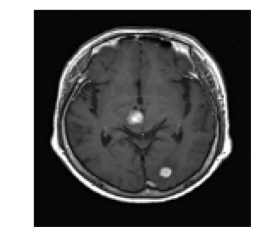

In [18]:
from matplotlib.pyplot import imshow
img = Image.open(r"/gdrive/My Drive/Colab Notebooks/Input/MRI_images/no/N17.jpg")
print(img.size)
img=img.resize((128,128))
print(img.size)
x = np.array(img)
print(x.size)

x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/gdrive/My Drive/Colab Notebooks/Input/MRI_images/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
print(x.size)

x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/gdrive/My Drive/Colab Notebooks/Demo.jpg")
img=img.resize((128,128,))
print(img.size)
x = np.array(img)
print(x.shape)


print(x.size)

x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

In [ ]:
16384*3

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/gdrive/My Drive/Colab Notebooks/Demo2.jpeg")

print(img.size)
x = np.array(img)
print(x.size)

x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/gdrive/My Drive/Colab Notebooks/Demo3.png")
print(img.size)
img2=img.resize((128,128))
print(img2.size)
x = np.array(img2)
print(x.size)

x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/gdrive/My Drive/Colab Notebooks/Demo4.jpg")
x = np.array(img.resize((128,128)))
print(x.size)

x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))